In [4]:
"""
Generates data for training
"""
import numpy as np

from qutip.visualization import plot_wigner, hinton, plot_fock_distribution
from qutip import Qobj
from qutip.wigner import qfunc, wigner
from qutip.states import thermal_dm
from qutip.random_objects import rand_dm

from qulearn.ops import cat, binomial, num, gkp
import numpy as np
from qutip import coherent_dm, destroy, mesolve, Options, fock_dm, coherent, expect
from qutip.visualization import plot_wigner_fock_distribution


import h5py

from skimage.util import random_noise
from skimage import transform
from skimage.filters import gaussian


from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import colors

import pickle

import os
import glob

In [5]:
# tf.keras.backend.set_floatx('float64')

In [6]:
fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {# 'backend': 'ps',
          'axes.labelsize': 8,
          'font.size': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'axes.labelpad': 1,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

In [7]:
datapath = "data/data-reduction/"
fnames = ["iMLE", "gan_l1_10"]

figpath = "figures/"

In [8]:
def read_file(path):
    """
    Reads a file
    """
    flist = None
    with open(path, 'rb') as f:
        flist = pickle.load(f)
    return flist



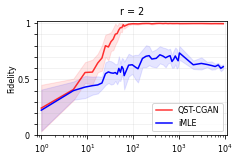

In [9]:
rank = 2
fdict = {}
    
gan_fidel_data_dict = {}
imle_fidel_data_dict = {}


datapoints = np.concatenate([np.arange(1024, 10100, 1024),
                            np.arange(128, 256, 32),
                            np.arange(256, 1024, 64),
                            np.arange(1, 64, 4),
                            np.arange(64, 128, 16),])

for num_points in datapoints:
    pathname = datapath+"fidelities-iMLE-rank-"+str(rank)+"-"+str(num_points)
    fidelities_imle = read_file(pathname)
    
    imle_fidel_data_dict[num_points] = fidelities_imle
    
    
    pathname = datapath+"fidelities-QST-CGAN-rank-"+str(rank)+"-"+str(num_points)
    fidelities_gan = read_file(pathname)
    
    gan_fidel_data_dict[num_points] = fidelities_gan


    
gan_fidel_data_mean = []
gan_fidel_data_std = []

imle_fidel_data_mean = []
imle_fidel_data_std = []

datapoints = []

for key in sorted(gan_fidel_data_dict):
    if len(gan_fidel_data_dict[key]) > 0:
        gan_fidel_data_mean.append(np.mean([glist[-1] for glist in gan_fidel_data_dict[key]]))
        gan_fidel_data_std.append(np.std([glist[-1] for glist in gan_fidel_data_dict[key]]))
        
        imle_fidel_data_mean.append(np.mean([ilist[-1] for ilist in imle_fidel_data_dict[key]]))
        imle_fidel_data_std.append(np.std([ilist[-1] for ilist in imle_fidel_data_dict[key]]))
        datapoints.append(key)

gan_fidel_data_mean = np.array(gan_fidel_data_mean)
gan_fidel_data_std = np.array(gan_fidel_data_std)

imle_fidel_data_mean = np.array(imle_fidel_data_mean)
imle_fidel_data_std = np.array(imle_fidel_data_std)

datapoints = np.array(datapoints)

gan_fidel_data_mean = gan_fidel_data_mean
gan_fidel_data_std = gan_fidel_data_std

imle_fidel_data_mean = imle_fidel_data_mean
imle_fidel_data_std = imle_fidel_data_std

data_xvec = datapoints


# plt.figure(figsize=(fig_width, fig_height))
plt.plot(data_xvec, gan_fidel_data_mean, color="r", alpha=0.8, label="QST-CGAN")
plt.fill_between(data_xvec, gan_fidel_data_mean - gan_fidel_data_std,
                gan_fidel_data_mean + gan_fidel_data_std, alpha=0.1,
                 color="r")

plt.plot(data_xvec, imle_fidel_data_mean, alpha = 1, color="b", label="iMLE")
plt.fill_between(data_xvec, imle_fidel_data_mean - imle_fidel_data_std,
                imle_fidel_data_mean + imle_fidel_data_std, alpha=0.1,
                 color="b")


plt.gca().set_xscale('symlog')
plt.gca().set_xlim([0.8, 11000])

ax1 = plt.gca()
ax1.set_ylabel("Fidelity")
# ax1.set_xlabel("Iterations")
ax1.set_ylim([0, 1.02])

ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
ax1.set_yticklabels([0, "", "", "", "", "0.5", "", "", "", "", 1])


ax1.set_xlim([0.8, 11000])
ax1.legend(loc="lower right")
plt.title("r = {}".format(rank))
plt.gca().set_xscale('log')
# ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.2)
ax1.set_xticks([1, 10, 100, 1000, 10000])
ax1.get_xaxis().set_major_formatter(mpl.ticker.LogFormatterSciNotation())



plt.savefig(figpath+"fig20a-rank-{}.pdf".format(rank), bbox_inches="tight", pad_inches=0)

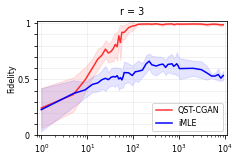

In [10]:
rank = 3
fdict = {}
    
    
gan_fidel_data_dict = {}
imle_fidel_data_dict = {}


datapoints = np.concatenate([np.arange(1024, 10100, 1024),
                            np.arange(128, 256, 32),
                            np.arange(256, 1024, 64),
                            np.arange(1, 64, 4),
                            np.arange(64, 128, 16),])

for num_points in datapoints:
    pathname = datapath+"fidelities-iMLE-rank-"+str(rank)+"-"+str(num_points)
    fidelities_imle = read_file(pathname)
    
    imle_fidel_data_dict[num_points] = fidelities_imle
    
    
    pathname = datapath+"fidelities-QST-CGAN-rank-"+str(rank)+"-"+str(num_points)
    fidelities_gan = read_file(pathname)
    
    gan_fidel_data_dict[num_points] = fidelities_gan
    
    
gan_fidel_data_mean = []
gan_fidel_data_std = []

imle_fidel_data_mean = []
imle_fidel_data_std = []

datapoints = []

for key in sorted(gan_fidel_data_dict):
    if len(gan_fidel_data_dict[key]) > 0:
        gan_fidel_data_mean.append(np.mean([glist[-1] for glist in gan_fidel_data_dict[key]]))
        gan_fidel_data_std.append(np.std([glist[-1] for glist in gan_fidel_data_dict[key]]))
        
        imle_fidel_data_mean.append(np.mean([ilist[-1] for ilist in imle_fidel_data_dict[key]]))
        imle_fidel_data_std.append(np.std([ilist[-1] for ilist in imle_fidel_data_dict[key]]))
        datapoints.append(key)

gan_fidel_data_mean = np.array(gan_fidel_data_mean)
gan_fidel_data_std = np.array(gan_fidel_data_std)

imle_fidel_data_mean = np.array(imle_fidel_data_mean)
imle_fidel_data_std = np.array(imle_fidel_data_std)

datapoints = np.array(datapoints)

gan_fidel_data_mean = gan_fidel_data_mean
gan_fidel_data_std = gan_fidel_data_std

imle_fidel_data_mean = imle_fidel_data_mean
imle_fidel_data_std = imle_fidel_data_std

data_xvec = datapoints


# plt.figure(figsize=(fig_width, fig_height))
plt.plot(data_xvec, gan_fidel_data_mean, color="r", alpha=0.8, label="QST-CGAN")
plt.fill_between(data_xvec, gan_fidel_data_mean - gan_fidel_data_std,
                gan_fidel_data_mean + gan_fidel_data_std, alpha=0.1,
                 color="r")

plt.plot(data_xvec, imle_fidel_data_mean, alpha = 1, color="b", label="iMLE")
plt.fill_between(data_xvec, imle_fidel_data_mean - imle_fidel_data_std,
                imle_fidel_data_mean + imle_fidel_data_std, alpha=0.1,
                 color="b")


plt.gca().set_xscale('symlog')
plt.gca().set_xlim([0.8, 11000])

ax1 = plt.gca()
ax1.set_ylabel("Fidelity")
# ax1.set_xlabel("Iterations")
ax1.set_ylim([0, 1.02])

ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
ax1.set_yticklabels([0, "", "", "", "", "0.5", "", "", "", "", 1])


ax1.set_xlim([0.8, 11000])

plt.title("r = {}".format(rank))
ax1.legend(loc="lower right")
plt.gca().set_xscale('log')
# ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.2)
ax1.set_xticks([1, 10, 100, 1000, 10000])
ax1.get_xaxis().set_major_formatter(mpl.ticker.LogFormatterSciNotation())



plt.savefig(figpath+"fig20b-rank-{}.pdf".format(rank), bbox_inches="tight", pad_inches=0)

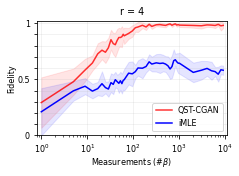

In [11]:
rank = 4
fdict = {}
    
    
gan_fidel_data_dict = {}
imle_fidel_data_dict = {}


datapoints = np.concatenate([np.arange(1024, 10100, 1024),
                            np.arange(128, 256, 32),
                            np.arange(256, 1024, 64),
                            np.arange(1, 64, 4),
                            np.arange(64, 128, 16),])

for num_points in datapoints:
    pathname = datapath+"fidelities-iMLE-rank-"+str(rank)+"-"+str(num_points)
    fidelities_imle = read_file(pathname)
    
    imle_fidel_data_dict[num_points] = fidelities_imle
    
    
    pathname = datapath+"fidelities-QST-CGAN-rank-"+str(rank)+"-"+str(num_points)
    fidelities_gan = read_file(pathname)
    
    gan_fidel_data_dict[num_points] = fidelities_gan
    
    
gan_fidel_data_mean = []
gan_fidel_data_std = []

imle_fidel_data_mean = []
imle_fidel_data_std = []

datapoints = []

for key in sorted(gan_fidel_data_dict):
    if len(gan_fidel_data_dict[key]) > 0:
        gan_fidel_data_mean.append(np.mean([glist[-1] for glist in gan_fidel_data_dict[key]]))
        gan_fidel_data_std.append(np.std([glist[-1] for glist in gan_fidel_data_dict[key]]))
        
        imle_fidel_data_mean.append(np.mean([ilist[-1] for ilist in imle_fidel_data_dict[key]]))
        imle_fidel_data_std.append(np.std([ilist[-1] for ilist in imle_fidel_data_dict[key]]))
        datapoints.append(key)

gan_fidel_data_mean = np.array(gan_fidel_data_mean)
gan_fidel_data_std = np.array(gan_fidel_data_std)

imle_fidel_data_mean = np.array(imle_fidel_data_mean)
imle_fidel_data_std = np.array(imle_fidel_data_std)

datapoints = np.array(datapoints)

gan_fidel_data_mean = gan_fidel_data_mean
gan_fidel_data_std = gan_fidel_data_std

imle_fidel_data_mean = imle_fidel_data_mean
imle_fidel_data_std = imle_fidel_data_std

data_xvec = datapoints


# plt.figure(figsize=(fig_width, fig_height))
plt.plot(data_xvec, gan_fidel_data_mean, color="r", alpha=0.8, label="QST-CGAN")
plt.fill_between(data_xvec, gan_fidel_data_mean - gan_fidel_data_std,
                gan_fidel_data_mean + gan_fidel_data_std, alpha=0.1,
                 color="r")

plt.plot(data_xvec, imle_fidel_data_mean, alpha = 1, color="b", label="iMLE")
plt.fill_between(data_xvec, imle_fidel_data_mean - imle_fidel_data_std,
                imle_fidel_data_mean + imle_fidel_data_std, alpha=0.1,
                 color="b")



plt.gca().set_xlim([0.8, 11000])

ax1 = plt.gca()
ax1.set_ylabel("Fidelity")
ax1.set_xlabel(r"Measurements (#$\beta$)")
ax1.set_ylim([0, 1.02])

ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
ax1.set_yticklabels([0, "", "", "", "", "0.5", "", "", "", "", 1])

ax1.set_xscale('log')
ax1.set_xlim([0.8, 11000])

plt.title("r = {}".format(rank))
ax1.legend(loc="lower right")
plt.gca().set_xscale('log')
# ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.2)
ax1.set_xticks([1, 10, 100, 1000, 10000])
ax1.get_xaxis().set_major_formatter(mpl.ticker.LogFormatterSciNotation())


plt.savefig(figpath+"fig20c-rank-{}.pdf".format(rank), bbox_inches="tight", pad_inches=0)